<a href="https://colab.research.google.com/github/leentasan/RekdatETL/blob/main/Data_Merge_dan_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_cuaca = pd.read_csv('cleaned_data_cuaca.csv')
df_cuaca.head(10)

,Tanggal,Tavg,RH_avg,RR,ff_avg
0,2022-01-02,26.8,84.0,31.5,3.0
1,2022-01-09,26.2,88.0,6.8,1.0
2,2022-01-16,28.2,76.0,0.0,1.0
3,2022-01-23,26.1,87.0,5.4,3.0
4,2022-01-30,27.5,81.0,0.5,2.0
5,2022-02-06,26.2,83.0,2.9,2.0
6,2022-02-13,25.0,91.0,8888.0,2.0
7,2022-02-20,27.0,84.0,0.0,0.0
8,2022-02-27,26.6,78.0,19.7,1.0
9,2022-03-06,26.1,84.0,0.4,3.0


In [ ]:
df_indomie = pd.read_csv('cleaned_data_indomie.csv')
df_indomie.head(10)

,formattedAxisTime,value,hasData
0,2022-01-02,50,True
1,2022-01-09,51,True
2,2022-01-16,49,True
3,2022-01-23,49,True
4,2022-01-30,59,True
5,2022-02-06,54,True
6,2022-02-13,53,True
7,2022-02-20,53,True
8,2022-02-27,55,True
9,2022-03-06,52,True


In [ ]:
# Mengganti nama kolom
df_cuaca.rename(columns={
    'Tavg': 'Temperature',
    'RH_avg': 'Kelembapan',
    'RR': 'Curah Hujan',
    'ff_avg': 'kecepatan angin'
}, inplace=True)

print(df_cuaca.head())

      Tanggal  Temperature  Kelembapan  Curah Hujan  kecepatan angin
0  2022-01-02         26.8        84.0         31.5              3.0
1  2022-01-09         26.2        88.0          6.8              1.0
2  2022-01-16         28.2        76.0          0.0              1.0
3  2022-01-23         26.1        87.0          5.4              3.0
4  2022-01-30         27.5        81.0          0.5              2.0


In [ ]:
# Mengganti nama kolom
df_indomie.rename(columns={
    'formattedAxisTime': 'Tanggal'
}, inplace=True)

print(df_indomie.head())

      Tanggal  value  hasData
0  2022-01-02     50     True
1  2022-01-09     51     True
2  2022-01-16     49     True
3  2022-01-23     49     True
4  2022-01-30     59     True


In [ ]:
# Merge kedua DataFrame berdasarkan kolom 'Tanggal'
merged_df = pd.merge(df_indomie, df_cuaca, on='Tanggal')

# Menampilkan hasil gabungan
print(merged_df)

        Tanggal  value  hasData  Temperature  Kelembapan  Curah Hujan  \
0    2022-01-02     50     True         26.8        84.0         31.5   
1    2022-01-09     51     True         26.2        88.0          6.8   
2    2022-01-16     49     True         28.2        76.0          0.0   
3    2022-01-23     49     True         26.1        87.0          5.4   
4    2022-01-30     59     True         27.5        81.0          0.5   
..          ...    ...      ...          ...         ...          ...   
146  2024-10-20     45     True         25.1        90.0          2.0   
147  2024-10-27     50     True         28.0        78.0          0.0   
148  2024-11-03     51     True         26.2        86.0          9.3   
149  2024-11-10     53     True         26.9        88.0         25.9   
150  2024-11-17     51     True         26.1        88.0          4.2   

     kecepatan angin  
0                3.0  
1                1.0  
2                1.0  
3                3.0  
4       

In [ ]:
correlation = merged_df[['value', 'Temperature', 'Kelembapan', 'Curah Hujan', 'kecepatan angin']].corr()
print(correlation)

                    value  Temperature  Kelembapan  Curah Hujan  \
value            1.000000    -0.234353    0.124602     0.037287   
Temperature     -0.234353     1.000000   -0.525080    -0.054716   
Kelembapan       0.124602    -0.525080    1.000000     0.143192   
Curah Hujan      0.037287    -0.054716    0.143192     1.000000   
kecepatan angin -0.180237     0.037943   -0.228920     0.020561   

                 kecepatan angin  
value                  -0.180237  
Temperature             0.037943  
Kelembapan             -0.228920  
Curah Hujan             0.020561  
kecepatan angin         1.000000  


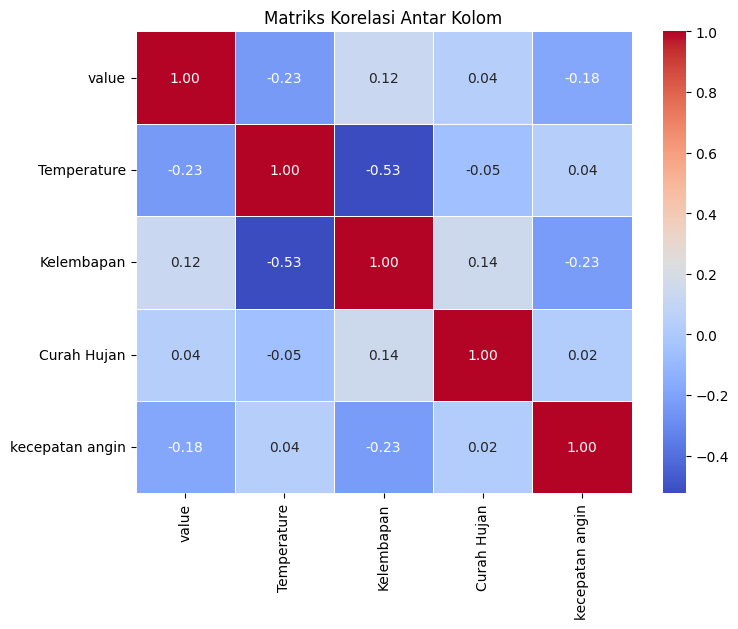

In [ ]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))  # Ukuran gambar
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi Antar Kolom')

# Menampilkan plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_cuaca = pd.read_csv('cleaned_data_cuaca.csv')
df_indomie = pd.read_csv('cleaned_data_indomie.csv')

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = merged_df[['Temperature', 'Kelembapan', 'Curah Hujan', 'kecepatan angin']]
y = merged_df['value']

In [ ]:
# Membagi data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model regresi linear
model = LinearRegression()

In [ ]:
# Melatih model dengan data training
model.fit(X_train, y_train)
# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 45.586121021865694
R-squared (R²): -0.020267881643600827


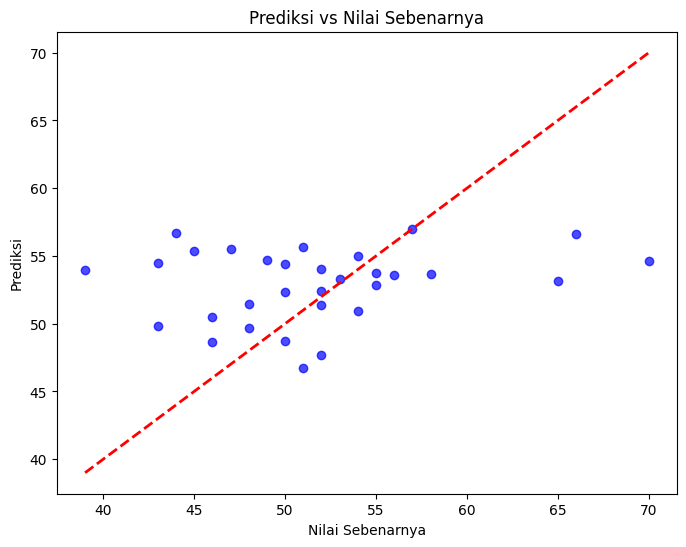

In [ ]:
# Visualisasi hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.show()

In [ ]:
# Menampilkan koefisien regresi
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Koefisien'])
print(coefficients)

                 Koefisien
Temperature      -1.787876
Kelembapan       -0.051727
Curah Hujan       0.000062
kecepatan angin  -1.270257
